In [2]:
import os
import random
import json
import pandas as pd
import numpy as np
import glob
import math
import numpy
from collections import defaultdict

In [3]:
from ipynb.fs.full. Model import *

In [4]:
vehicle_list, object_list = getData("4way/")
vehicle_df, object_df, nObjects = getDf(vehicle_list, object_list)
coverage = calcObjectCoverage(vehicle_df, object_df, nObjects)
#print(coverage) 

In [5]:
delta = 4
leftVehicle = NoOfObjects(vehicle_df, object_df, coverage)
optimisedSet, objectSet = greedyAppx(leftVehicle, delta)

In [6]:
print("Optimised Set : ", optimisedSet,"\nNo of vehicles :  " ,len(optimisedSet))
print("No of objects Covered : %i out of %i"%(len(objectSet),object_df.shape[0]))

Optimised Set :  {'v3', 'v17', 'v8', 'v32', 'v42'} 
No of vehicles :   5
No of objects Covered : 35 out of 53


In [7]:
uncovered_objects, optimised_coordinates, covered_objects = [], [], []
for index in vehicle_df.index:
    if vehicle_df.iloc[index]["Id"] in list(optimisedSet):
        optimised_coordinates.append([vehicle_df.iloc[index]["x_coordinate"], vehicle_df.iloc[index]["y_coordinate"], vehicle_df.iloc[index]["radius"]])
X,Y = [],[]
for index in object_df.index:
    if object_df.iloc[index]["Id"] in list(objectSet) :
        covered_objects.append([object_df.iloc[index]["x_coordinate"], object_df.iloc[index]["y_coordinate"]])
    else:
        uncovered_objects.append([object_df.iloc[index]["x_coordinate"], object_df.iloc[index]["y_coordinate"]])
vehicle_coordinates = vehicle_df[["x_coordinate", "y_coordinate"]].values.tolist()

<ipython-input-8-d0572e561bd6>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


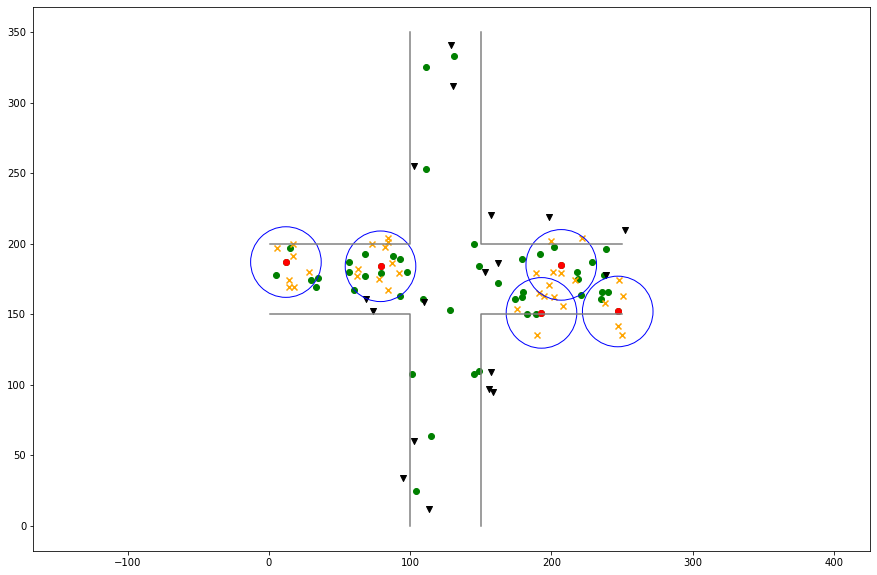

In [8]:
from matplotlib import pyplot as plt, patches
fig = plt.figure(figsize=(15,10))

for p, q in vehicle_coordinates:
    plt.scatter(p, q, color="green")

for x,y,r in optimised_coordinates:
    ax = fig.add_subplot()
    plt.scatter(x, y, color="red")
    ax.add_patch(patches.Circle((x, y), radius=r, color='blue', fill=False))

for p, q in uncovered_objects:
    plt.scatter(p, q, color="black", marker = "v")

for p, q in covered_objects:
    plt.scatter(p, q, color="orange", marker = "x")

x = [1, 100, 100]
y = [200, 200, 350]
plt.plot(x, y, color = "grey")
x = [150, 150, 250]
y = [350, 200, 200]
plt.plot(x, y, color = "grey")
x = [1, 100, 100]
y = [150, 150, 0]
plt.plot(x, y, color = "grey")
x = [150, 150, 250]
y = [0, 150, 150]
plt.plot(x, y, color = "grey")

ax.axis('equal')
plt.show()